In [42]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [43]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据并给每列数据起个名

In [44]:
df.head(6)  #为pandas.head() 意思是返回前n行数据

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


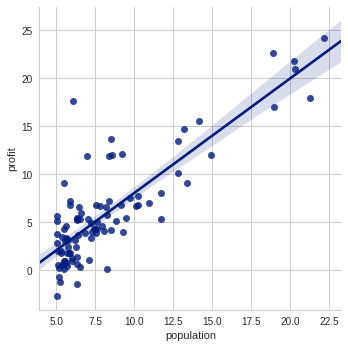

In [46]:
sns.lmplot('population','profit',df,size=5)
#这是用seaborn的绘图，其实用matplotlib也可以：df.plot(kind='scatter',x='population',y='profit',figsize=(12,7))
#只不过效果没有sns好
plt.show()

In [47]:
def get_X(df):
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并
    return np.array(data.iloc[:, :-1])  # 这个操作返回 ndarray,不是矩阵


def get_y(df):
#     '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])#df.iloc[:, -1]是指df的最后一列


def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())#特征缩放

In [48]:
P=get_X(df)
print(type(P))

<class 'numpy.ndarray'>


In [49]:
def linear_regression(X_data, y_data, alpha, epoch, optimizer=tf.train.GradientDescentOptimizer):
    """tensorflow implementation"""
    # placeholder for graph input
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.placeholder(tf.float32, shape=y_data.shape)

    # construct the graph
    with tf.variable_scope('linear-regression'):
        W = tf.get_variable("weights",
                            (X_data.shape[1], 1),
                            initializer=tf.random_normal_initializer())  # n*1

        y_pred = tf.matmul(X, W)  # m*n @ n*1 -> m*1

        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)  # (m*1).T @ m*1 = 1*1

    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)

    # run the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loss_data = []

        for i in range(epoch):
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            loss_data.append(loss_val[0, 0])  # because every loss_val is 1*1 ndarray

            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:  # early break when it's converged
                # print('Converged at epoch {}'.format(i))
                break

    # clear the graph
    tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val}  # just want to return in row vector format

In [50]:
data=pd.read_csv('ex1data1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [53]:
X = get_X(data)
print(type(X))

y = get_y(data)
print(y.shape,type(y))

<class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [54]:
theta=np.zeros(X.shape[1])   #就是每个样本的特征数
print(theta.shape)

(2,)


In [55]:
def lr_cost(theta,X,y):
    m=X.shape[0]
    inner=X@theta-y
    square_sum=inner.T@inner
    cost=square_sum/(2*m)
    return cost

In [56]:
lr_cost(theta,X,y)

32.072733877455669

In [57]:
def gradient(theta,X,y):
    m=X.shape[0]
    inner=X.T@(X@theta-y)
    return inner/m

In [58]:
def batch_gradient_decent(theta,X,y,epoch,alpha=0.01):
    cost_data=[lr_cost(theta,X,y)]
    _theta=theta.copy()
    for _ in range(epoch):
        _theta=_theta-alpha*gradient(_theta,X,y)
        cost_data.append(lr_cost(_theta,X,y))
    return _theta,cost_data
        

In [59]:
epoch=500
final_theta,cost_data=batch_gradient_decent(theta,X,y,epoch)

In [60]:
print(final_theta,cost_data[-1])

[-2.28286727  1.03099898] 4.71380953112


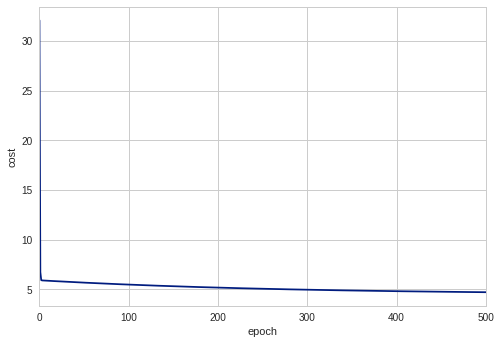

In [61]:
ax=sns.tsplot(cost_data,time=np.arange(epoch+1))
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
plt.show()

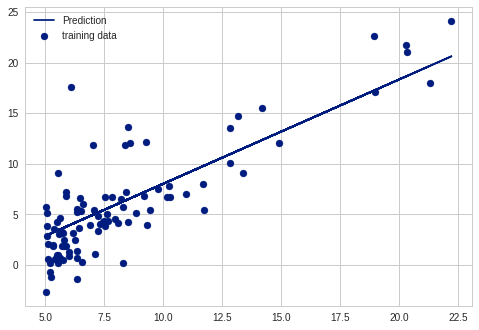

In [62]:
b=final_theta[0]   #intercept--截距
m=final_theta[1]   #slope--斜率
plt.scatter(data.population,data.profit,label='training data')
plt.plot(data.population,data.population*m+b,label='Prediction')
plt.legend(loc=2)    #loc=2意思是将图例显示在左上方
plt.show()

# 选修章节之特征缩放

In [63]:
raw_data=pd.read_csv('ex1data2.txt',names=['square','bedrooms','price'])   #读入数据
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [64]:
def normalize_feature(df):
    return df.apply(lambda column:(column-column.mean())/column.std())

In [65]:
data=normalize_feature(raw_data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


# multi-var batch gradient decent 多批量梯度下降

In [66]:
X=get_X(data)
print(X.shape,type(X))

y=get_y(data)
print(y.shape,type(y))

(47, 3) <class 'numpy.ndarray'>
(47,) <class 'numpy.ndarray'>


In [67]:
alpha=0.01
theta=np.zeros(X.shape[1])
epoch=500

In [68]:
final_theta,cost_data=batch_gradient_decent(theta,X,y,epoch,alpha=alpha)

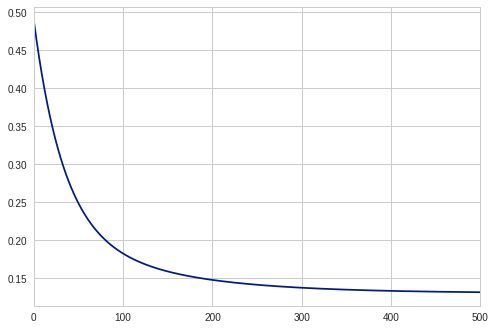

In [69]:
sns.tsplot(time=np.arange(len(cost_data)),data=cost_data)
plt.show()

In [70]:
final_theta

array([ -1.18994649e-16,   8.30383883e-01,   8.23982853e-04])

# learning rate 学习率

In [71]:
base=np.logspace(-1,-5,num=4)
candidate=np.sort(np.concatenate((base,base*3)))
print(candidate)

[  1.00000000e-05   3.00000000e-05   2.15443469e-04   6.46330407e-04
   4.64158883e-03   1.39247665e-02   1.00000000e-01   3.00000000e-01]


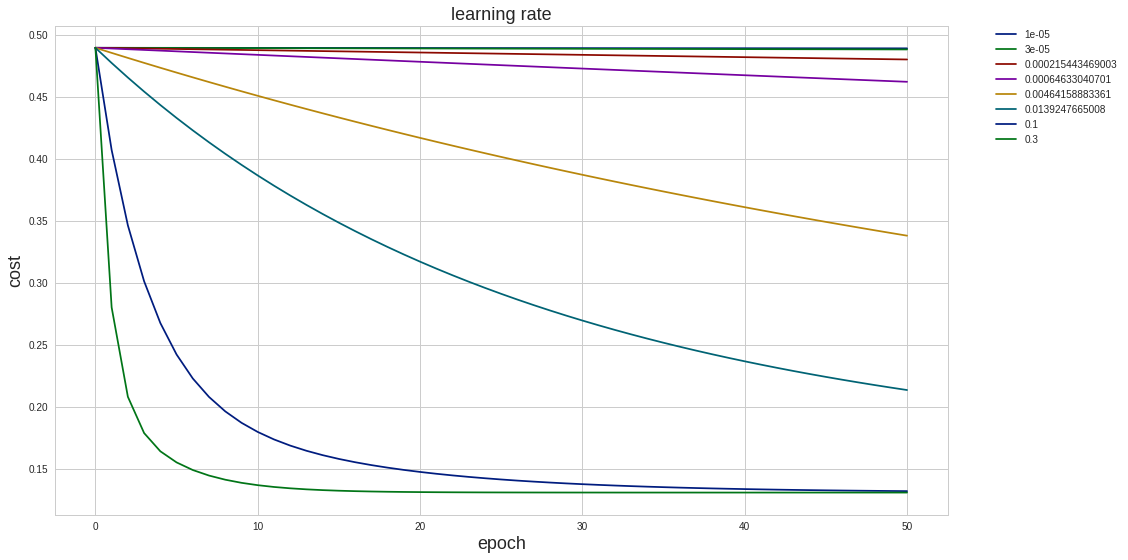

In [72]:
epoch=50
fig,ax=plt.subplots(figsize=(16,9)) #fig是以整个图像为对象，可以通过ax来索引
'''fig,axes = plt.subplots(2,3) 这个意思是产生2×3个子窗口！！'''
for alpha in candidate:
    _,cost_data=batch_gradient_decent(theta,X,y,epoch,alpha=alpha)
    ax.plot(np.arange(epoch+1),cost_data,label=alpha)

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()    
    
    
    


# Normal equation (正规方程)

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$


In [73]:
#正规方程
def normaleqn(X,y):
    theta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [74]:
final_theta2=normaleqn(X,y)
print(final_theta2)

[ -1.04083409e-16   8.84765988e-01  -5.31788197e-02]


# 尝试用几种不同的optimizer进行计算

In [93]:
X_data=get_X(data)
print(X_data.shape,type(X_data))

y_data=get_y(data).reshape(len(X_data),1)
print(y_data.shape,type(y))

(47, 3) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


In [94]:
epoch=2000
alpha=0.01

In [95]:
optimizer_dict={'GD': tf.train.GradientDescentOptimizer,
                'Adagrad': tf.train.AdagradOptimizer,
                'Adam': tf.train.AdamOptimizer,
                'Ftrl': tf.train.FtrlOptimizer,
                'RMS': tf.train.RMSPropOptimizer
               }
results = []
for name in optimizer_dict:
    res = linear_regression(X_data, y_data, alpha, epoch, optimizer=optimizer_dict[name])
    res['name'] = name
    results.append(res)

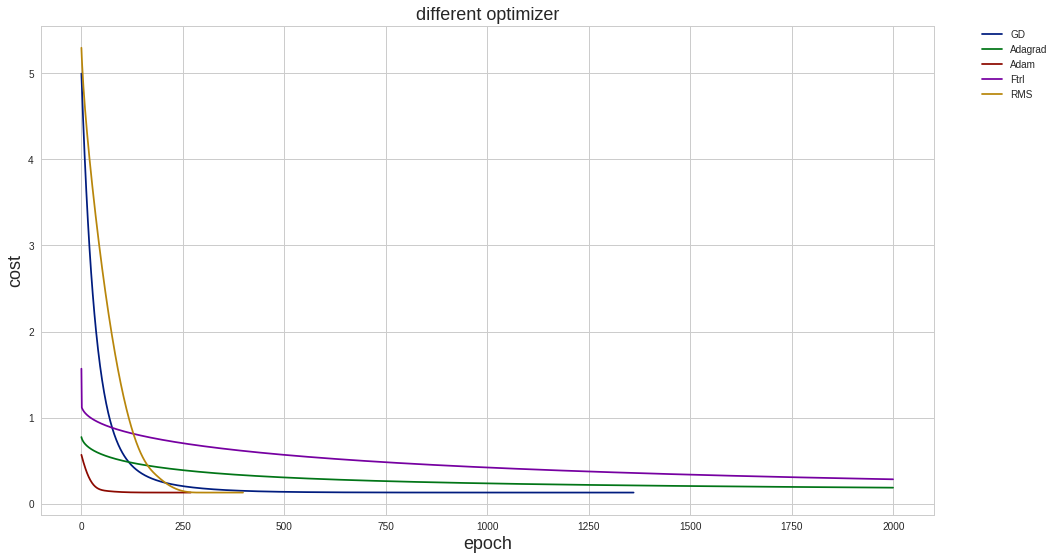

In [96]:
fig, ax = plt.subplots(figsize=(16, 9))

for res in results: 
    loss_data = res['loss']
    
#     print('for optimizer {}'.format(res['name']))
#     print('final parameters\n', res['parameters'])
#     print('final loss={}\n'.format(loss_data[-1]))
    ax.plot(np.arange(len(loss_data)), loss_data, label=res['name'])

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('different optimizer', fontsize=18)
plt.show()
    